In [1]:
import sys

sys.path.append("../")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from positioning.readwav import readwav
from positioning.get_spectrum_amplitude import get_spectrum_amplitude
from positioning.sound_db import SoundDB
from positioning import tools

In [3]:
sns.set(context="poster", style="whitegrid")

In [4]:
db_list = []
for i in range(16000, 25000, 1000):
    db = SoundDB(
        "../data/reference_non-audible_2d",
        first_freq=15000,
        last_freq=i,
        interval=0.2,
        dim=2,
    )
    db_list.append(db)

In [5]:
len(db_list)

9

In [6]:
true_pos = pd.read_csv(
    "../data/pos2d-non-audible_20230920/true_positions.csv", index_col=0
)

In [7]:
freq_est_poses = []
freq_est_polars = []
freq_errors = []
for db in db_list:
    est_poses = []
    est_polars = []
    errors = []
    for i in range(20):
        test_signal = readwav(f"../data/pos2d-non-audible_20230920/test{i}.wav")
        err = []
        pos = []
        polar = []
        for j in range(100):
            est_polar = np.ravel(
                db.positioning(test_signal[j * 96000 : (j + 2) * 96000], output="polar")
            )
            est_pos = tools.polar_to_rect(est_polar[1], np.radians(est_polar[0]))
            pos.append(est_pos)
            polar.append(est_polar)
            err.append(np.linalg.norm(est_pos - true_pos.iloc[i]))
        est_poses.append(pos)
        est_polars.append(polar)
        errors.append(err)
    freq_est_poses.append(est_poses)
    freq_est_polars.append(est_polars)
    freq_errors.append(errors)

In [8]:
df_est = pd.DataFrame()
for j in range(9):
    for i in range(20):
        df_est_pos = pd.DataFrame(freq_est_poses[j][i], columns=["x", "y"])
        df_est_pos["azimuth"] = np.array(freq_est_polars[j][i])[:, 0]
        df_est_pos["distance"] = np.array(freq_est_polars[j][i])[:, 1]
        df_est_pos["error"] = freq_errors[j][i]
        df_est_pos["test_position"] = f"test{i}"
        df_est_pos["frequency_band"] = f"15-{16+j}kHz"
        df_est = pd.concat([df_est, df_est_pos])
df_est.reset_index(inplace=True, drop=True)

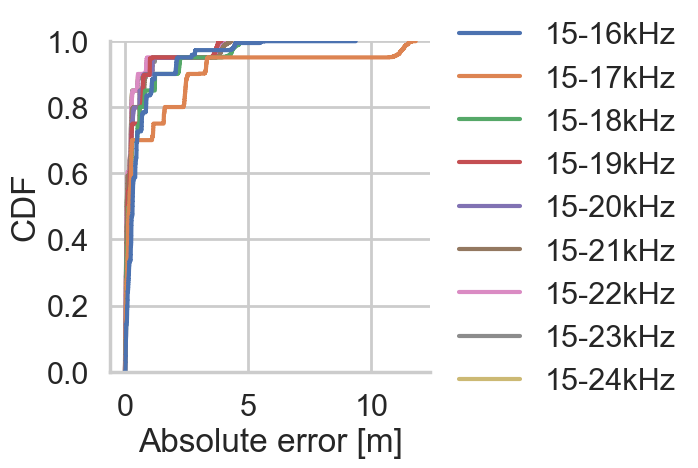

In [27]:
ax = sns.displot(df_est, x="error", hue="frequency_band", kind="ecdf")
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.6, 1), title=None)
plt.xlabel("Absolute error [m]")
plt.ylabel("CDF")
plt.savefig("../../result/non-audible/pos-freq.svg", bbox_inches="tight")

In [10]:
df_est_no18 = df_est[df_est["test_position"] != "test18"]

Text(83.05713233024694, 0.5, 'Cumulative distribution')

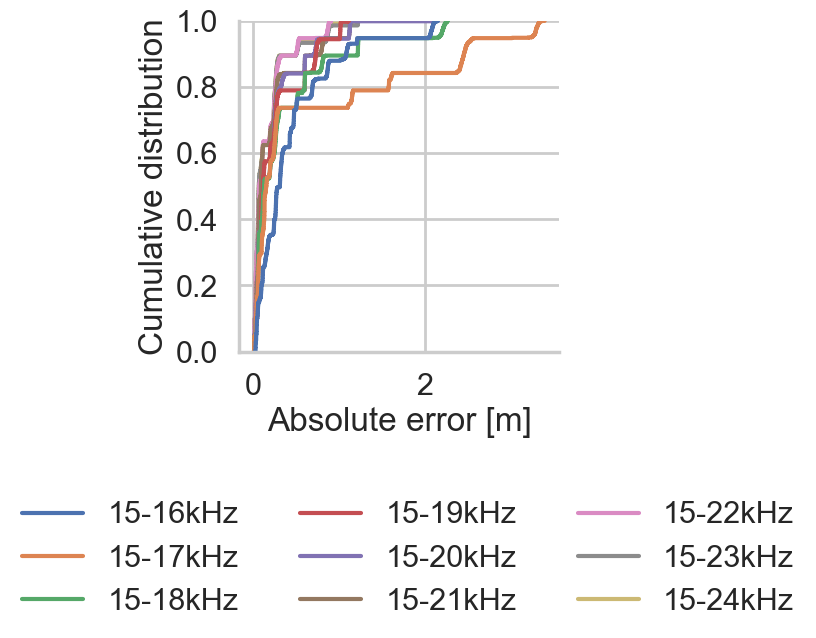

In [11]:
ax = sns.displot(df_est_no18, x="error", hue="frequency_band", kind="ecdf")
sns.move_legend(
    ax, "upper center", ncol=3, bbox_to_anchor=(0.4, 0), title=None, frameon=False
)
plt.xlabel("Absolute error [m]")
plt.ylabel("Cumulative distribution")

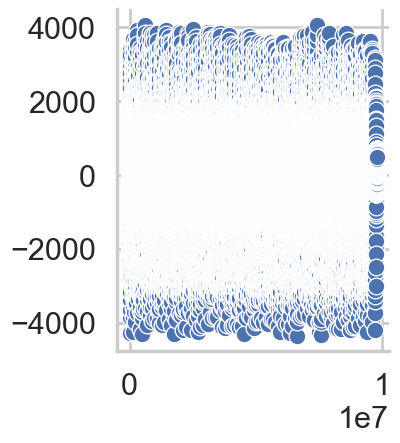

In [12]:
signal18 = readwav("../data/pos2d-non-audible_20230920/test18.wav")
sns.relplot(signal18)

In [13]:
spec18 = []
ampli18 = []
for i in range(100):
    spec, ampli = get_spectrum_amplitude(
        signal18[i * 96000 : (i + 2) * 96000],
        first_freq=15000,
        last_freq=24000,
        interval_length=0.2,
    )
    spec18.append(spec)
    ampli18.append(ampli)

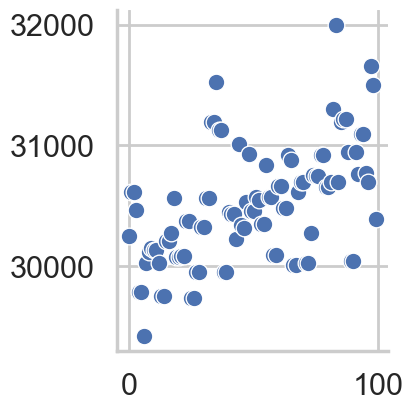

In [14]:
sns.relplot(ampli18)

In [15]:
signal19 = readwav("../data/pos2d-non-audible_20230920/test19.wav")
spec19 = []
ampli19 = []
for i in range(100):
    spec, ampli = get_spectrum_amplitude(
        signal19[i * 96000 : (i + 2) * 96000],
        first_freq=15000,
        last_freq=24000,
        interval_length=0.2,
    )
    spec19.append(spec)
    ampli19.append(ampli)

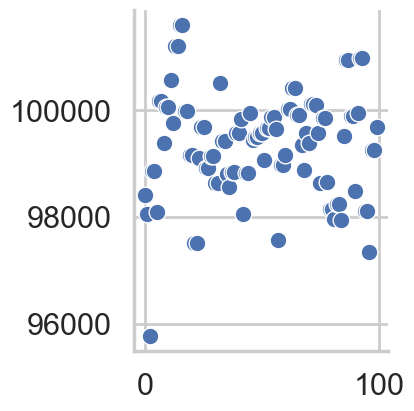

In [16]:
sns.relplot(ampli19)

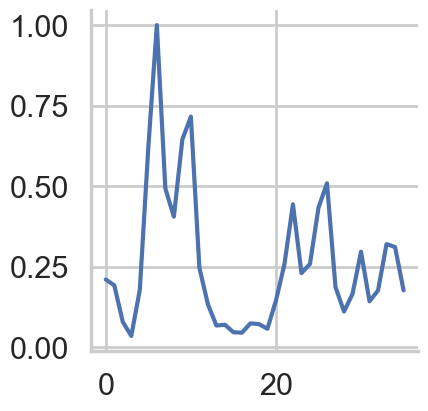

In [17]:
sns.relplot(spec18[1], kind="line")

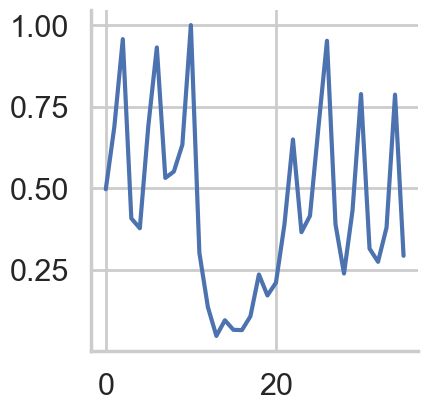

In [18]:
sns.relplot(spec19[1], kind="line")